In [1]:
# Boosting
# loop:
# 1. calculate weights errors: eta
# 2. calculate coefficient a_j
# 3. update weights
# 4. normalize weights to [0, 1] with sum being 1

# load datasets
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['label', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 
                   'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols', 
                   'proanthocyanins', 'color intensity', 'hue', 
                   'OD280/OD315 of diluted wines', 'proline']
df_wine = df_wine[df_wine['label'] != 1]
y = df_wine['label'].values
X = df_wine[['alcohol', 'OD280/OD315 of diluted wines']].values
print(pd.DataFrame(X).head())

# split train test dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print(pd.DataFrame(X_train).head())

       0     1
0  12.37  1.82
1  12.33  1.67
2  12.64  1.59
3  13.67  2.46
4  12.37  2.87
       0     1
0  12.20  1.83
1  12.33  2.31
2  12.79  1.47
3  12.84  2.15
4  11.56  3.69


In [3]:
# compare tree and adaboost scores
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              random_state=1, 
                              max_depth=1)
ada = AdaBoostClassifier(estimator=tree, 
                         n_estimators=500, 
                         learning_rate=0.1, 
                         random_state=1)
tree = tree.fit(X_train, y_train)
score_tree_train = tree.score(X_train, y_train)
score_tree_test = tree.score(X_test, y_test)

ada.fit(X_train, y_train)
score_ada_train = ada.score(X_train, y_train)
score_ada_test = ada.score(X_test, y_test)

print('Decision Tree train/test score: %.3f/%.3f' % (score_tree_train, score_tree_test))
print('Adaboost train/test score: %.3f/%.3f' % (score_ada_train, score_ada_test))

Decision Tree train/test score: 0.916/0.875
Adaboost train/test score: 1.000/0.917


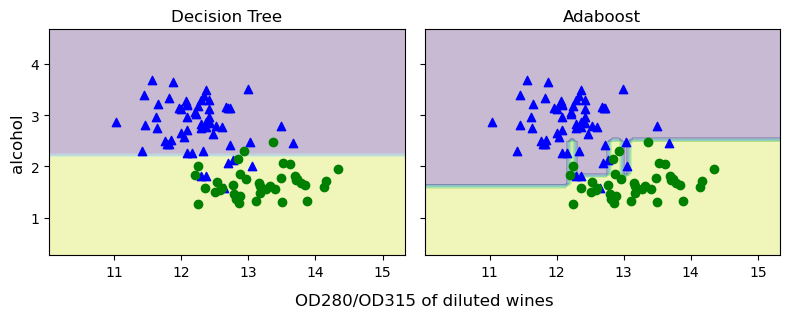

In [4]:
# visualize tree and adaboost decision area
import numpy as np
import matplotlib.pyplot as plt
xmin = X_train[:, 0].min() - 1
xmax = X_train[:, 0].max() + 1
ymin = X_train[:, 1].min() - 1
ymax = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.1), 
                     np.arange(ymin, ymax, 0.1))
fig, ax = plt.subplots(nrows=1, ncols=2, 
                       sharex='col', 
                       sharey='row', 
                       figsize=(8, 3))
for idx, clf, name in zip([0, 1], 
                          [tree, ada], 
                          ['Decision Tree', 'Adaboost']):
    clf.fit(X_train, y_train)
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    ax[idx].contourf(xx, yy, z, alpha=0.3)
    ax[idx].scatter(X_train[y_train==0, 0], 
                    X_train[y_train==0, 1], 
                    c='blue', marker='^')
    ax[idx].scatter(X_train[y_train==1, 0], 
                    X_train[y_train==1, 1], 
                    c='green', marker='o')
    ax[idx].set_title(name)
ax[0].set_ylabel('alcohol', fontsize=12)
plt.tight_layout()
plt.text(0, -0.2, 
         s='OD280/OD315 of diluted wines', 
         ha='center', 
         va='center', 
         fontsize=12, 
         transform=ax[1].transAxes)
plt.show()   # adaboost's area looks like bagging